# Analysis by Prisca

## About the dataset

In [ ]:
# Predicting the house price of Gurgaon

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
df_clean=pd.read_csv(r'C:\Users\USER\Documents\india house prediction\house_cleaned.csv')

In [413]:
df_uncleaned=pd.read_csv(r'C:\Users\USER\Documents\india house prediction\houses.csv')

In [414]:
df_clean.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [415]:
df_clean.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'],
      dtype='object')

# data structure

In [416]:
# the columns are much , here i chose the columns that can help in price predictions in the future

In [417]:
df_price  = df_clean[['price', 'price_per_sqft','area','bedRoom', 'balcony']] # i remove bathroom because it has high correlation with bedroom

In [418]:
df_price

,price,price_per_sqft,area,bedRoom,balcony
0,5.25,20115.0,2610.0,5,3+
1,5.70,105751.0,539.0,5,2
2,2.10,38251.0,549.0,10,3+
3,5.00,43066.0,1161.0,21,3+
4,3.00,53763.0,558.0,12,3+
...,...,...,...,...,...
959,5.50,30556.0,1800.0,4,3
960,4.25,31481.0,1350.0,3,3
961,4.50,33333.0,1350.0,3,2
962,3.25,33129.0,981.0,3,3


# data cleaning

In [419]:
import warnings
warnings.filterwarnings('ignore')

In [420]:
df_price['balcony'].unique() # getting the unique values contained in balcony columns

array(['3+', '2', '1', '3', '0'], dtype=object)

In [421]:
df_price['balcony']=df_price['balcony'].str.replace('+','')

In [422]:
df_price['balcony'] =df_price['balcony'].astype(int)  # balcony cleaned and data type changed from object to int

In [423]:
df_price.isnull().sum()

price             19
price_per_sqft    19
area              19
bedRoom            0
balcony            0
dtype: int64

In [424]:
dfr=df_price.dropna(inplace=True) # null values handled

In [425]:
df_price.duplicated().sum()

22

In [426]:
dfr1=df_price.drop_duplicates(inplace=True) #duplicates handled

# data exploration

In [427]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 963
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           923 non-null    float64
 1   price_per_sqft  923 non-null    float64
 2   area            923 non-null    float64
 3   bedRoom         923 non-null    int64  
 4   balcony         923 non-null    int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 39.7 KB


In [428]:
df_price.shape  # size of the data

(923, 5)

In [429]:
df_price.describe() #statistical analysis

,price,price_per_sqft,area,bedRoom,balcony
count,923.000000,923.000000,9.230000e+02,923.000000,923.000000
mean,4.866035,28287.669556,1.074597e+04,5.102925,2.171181
std,4.658554,43326.560545,2.387085e+05,3.278012,1.053325
min,0.070000,2.000000,4.500000e+01,1.000000,0.000000
25%,1.160000,10017.500000,9.190000e+02,3.000000,2.000000
50%,3.500000,18889.000000,1.800000e+03,4.000000,3.000000
75%,7.000000,29788.500000,3.175000e+03,6.000000,3.000000
max,31.500000,600000.000000,7.250000e+06,36.000000,3.000000


In [430]:
# correlation

In [431]:
df_corr=df_price.corr()

In [432]:
df_corr

,price,price_per_sqft,area,bedRoom,balcony
price,1.000000,0.230972,-0.017679,0.282310,0.408199
price_per_sqft,0.230972,1.000000,-0.024713,0.136255,0.111310
area,-0.017679,-0.024713,1.000000,-0.008064,0.029419
bedRoom,0.282310,0.136255,-0.008064,1.000000,0.379689
balcony,0.408199,0.111310,0.029419,0.379689,1.000000


In [433]:
# checking for multicollinearity

In [434]:
pd.DataFrame(np.linalg.inv(df_corr.values),columns=df_corr.columns,index=df_corr.index)

,price,price_per_sqft,area,bedRoom,balcony
price,1.275802,-0.223199,0.028487,-0.164645,-0.434261
price_per_sqft,-0.223199,1.062991,0.021546,-0.083053,0.003689
area,0.028487,0.021546,1.002623,0.015929,-0.049571
bedRoom,-0.164645,-0.083053,0.015929,1.202421,-0.380562
balcony,-0.434261,0.003689,-0.049571,-0.380562,1.322808


In [435]:
# price has high correlation with bedroom means bedroom is the most important factor in determing the house of prices

<Axes: >

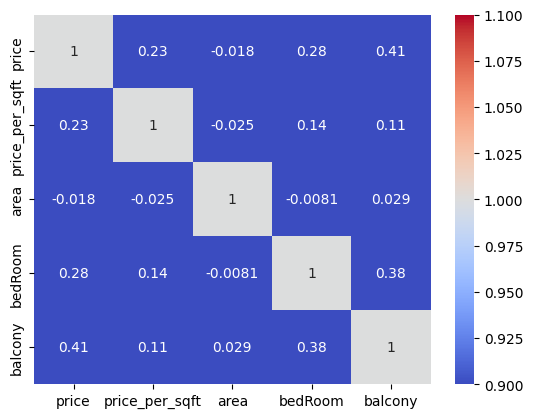

In [584]:
sns.heatmap(df_corr,annot=True,vmin=1,vmax=1,cmap='coolwarm')

# outliers

<Axes: >

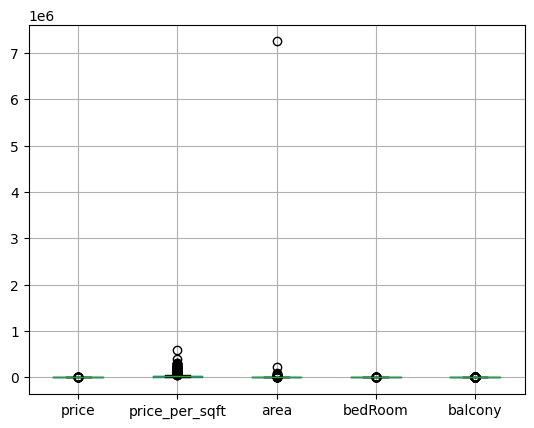

In [437]:
df_price.boxplot(column=['price', 'price_per_sqft', 'area', 'bedRoom', 'balcony'])

In [438]:
# handling outlier

In [439]:

new_df=df_price.copy()

In [440]:
q1=new_df['balcony'].quantile(0.25)
q3=new_df['balcony'].quantile(0.75)
iqr=q3-q1
upper_limit=q1+(1.5*iqr)
lower_limit=q3-(1.5*iqr)
upper_limit,lower_limit

(3.5, 1.5)

In [441]:
dfr4=new_df.loc[(new_df['balcony']>upper_limit)|(new_df['balcony']<lower_limit)]

In [442]:
len(dfr4)

218

In [443]:
new_df.loc[(new_df['balcony']>upper_limit,'balcony')]=upper_limit
new_df.loc[(new_df['balcony']<lower_limit,'balcony')]=lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x1b661368040>,
 'caps': [<matplotlib.lines.Line2D at 0x1b661368580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b661359d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1b661368ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b661368d60>],
 'means': []}

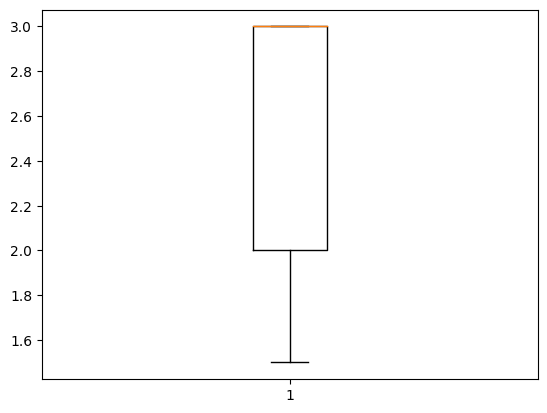

In [444]:
plt.boxplot(new_df['balcony'])

In [445]:
q1=new_df['bedRoom'].quantile(0.25)
q3=new_df['bedRoom'].quantile(0.75)
iqr=q3-q1
upper_limit=q1+(1.5*iqr)
lower_limit=q3-(1.5*iqr)
upper_limit,lower_limit

(7.5, 1.5)

In [446]:
df4=new_df.loc[(new_df['bedRoom']>upper_limit)|(new_df['bedRoom']<lower_limit)]

In [447]:
len(df4)

187

In [448]:
new_df.loc[(new_df['bedRoom']>upper_limit,'bedRoom')]=upper_limit
new_df.loc[(new_df['bedRoom']<lower_limit,'bedRoom')]=lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6613d9340>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6613d9880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6613d90a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6613d9dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6613e80a0>],
 'means': []}

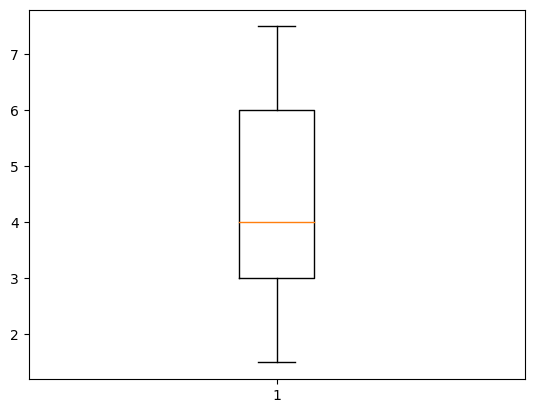

In [449]:
plt.boxplot(new_df['bedRoom'])

In [450]:
q1=new_df['price_per_sqft'].quantile(0.25)
q3=new_df['price_per_sqft'].quantile(0.75)
iqr=q3-q1
upper_limit=q1+(1.5*iqr)
lower_limit=q3-(1.5*iqr)
upper_limit,lower_limit

(39674.0, 132.0)

In [451]:
dft=new_df.loc[(new_df['price_per_sqft']>upper_limit)|(new_df['price_per_sqft']<lower_limit)]

In [452]:
len(dft)

113

In [453]:
new_df.loc[(new_df['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x1b66143f0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b66143f5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b661431dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b66143fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b66143fdc0>],
 'means': []}

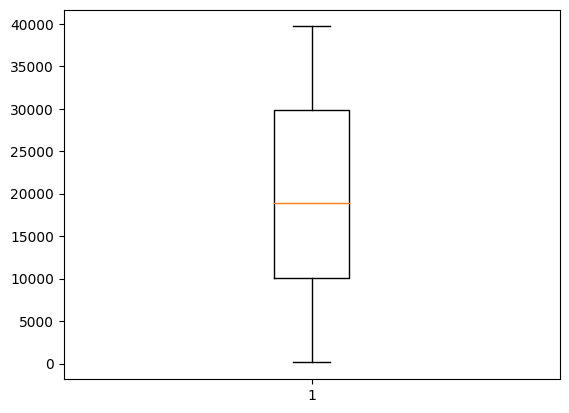

In [454]:
plt.boxplot(new_df['price_per_sqft'])

In [493]:
q1=new_df['price'].quantile(0.25)
q3=new_df['price'].quantile(0.75)
iqr=q3-q1
upper_limit=q1+(1.5*iqr)
lower_limit=q3-(1.5*iqr)
upper_limit,lower_limit

(9.92, -1.7599999999999998)

In [494]:
df9=new_df.loc[(new_df['price']>upper_limit)|(new_df['price']<lower_limit)]

In [495]:
len(df9)

118

In [496]:
new_df.loc[(new_df['price']>upper_limit),'price']=upper_limit
new_df.loc[(new_df['price']<lower_limit),'price']=lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6577db9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b65c1a1bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b65c664a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b65c1a1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b65c1a1940>],
 'means': []}

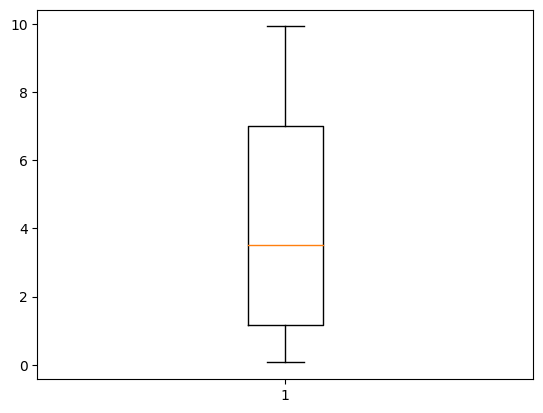

In [497]:
plt.boxplot(new_df['price'])

In [478]:
q1=new_df['area'].quantile(0.25)
q3=new_df['area'].quantile(0.75)
iqr=q3-q1
upper_Limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(39674.0, -2465.0)

In [479]:
# printing outlier in area
df5=new_df.loc[(new_df['area']>upper_limit)|(new_df['area']<lower_limit)]

In [480]:
len(df5)

0

In [481]:
new_df.loc[(new_df['area']>upper_limit),'area']=upper_limit
new_df.loc[(new_df['area']<lower_limit),'area']=lower_limit

In [482]:
len(df5)

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1b65d5647f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b65d564bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b65d564400>],
 'medians': [<matplotlib.lines.Line2D at 0x1b65d5640a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6631c3730>],
 'means': []}

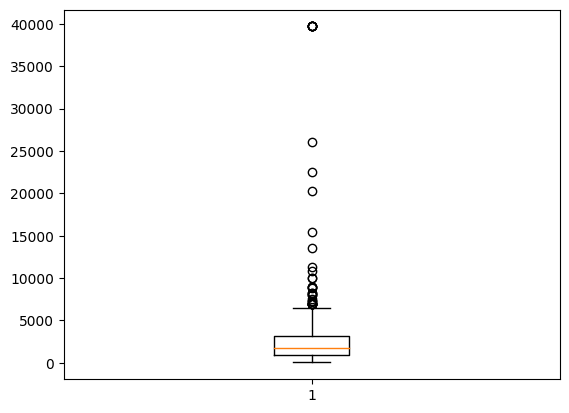

In [498]:
plt.boxplot(new_df['area'])

# visualization

<Axes: xlabel='bedRoom', ylabel='Count'>

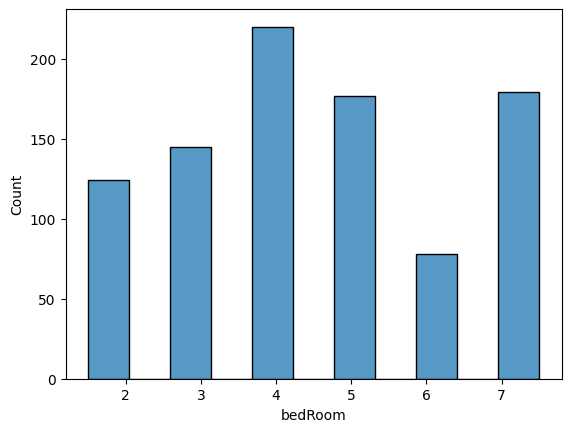

In [460]:
sns.histplot(x='bedRoom',data=new_df) # most house has 4 bedroom,the houses with 6 bed isnt much

In [461]:
new_df['bedRoom'].unique()

array([5. , 7.5, 6. , 3. , 4. , 7. , 2. , 1.5])

Text(0.5, 1.0, 'bedroom sizes')

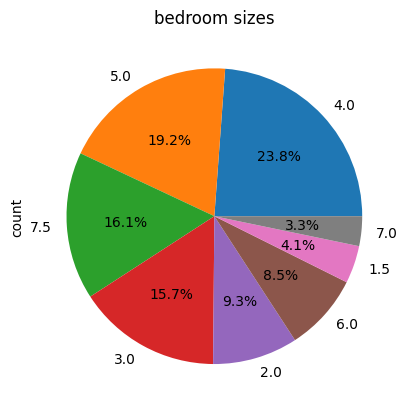

In [462]:
value_df=new_df['bedRoom'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title( 'bedroom sizes')
# 23% of houses in gurgaon has 4 bedroom, it means people prefer house with 4 bedroom or people buy houses with 4 bedroom
# 1.5 bed are of low demand


In [463]:
new_df.head()

,price,price_per_sqft,area,bedRoom,balcony
0,5.25,20115.0,2610.0,5.0,3.0
1,5.70,39674.0,539.0,5.0,2.0
2,2.10,38251.0,549.0,7.5,3.0
3,5.00,39674.0,1161.0,7.5,3.0
4,3.00,39674.0,558.0,7.5,3.0


In [464]:
bal_value=new_df['balcony'].value_counts()

In [465]:
bal_value

balcony
3.0    490
1.5    218
2.0    215
Name: count, dtype: int64

Text(0.5, 1.0, 'house balcony')

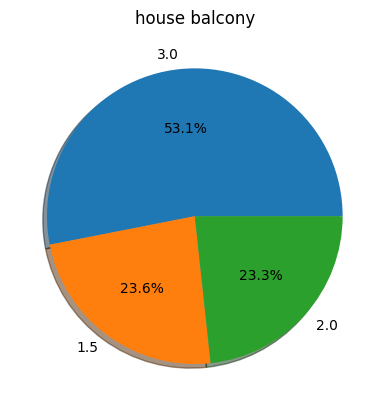

In [466]:
plt.pie(bal_value,autopct='%1.1f%%', labels=[3.0,1.5,2.0],shadow=True)
plt.title('house balcony')

# 53% of most house in gurgaon has 3 balconies in it ,they prefer houses with more balcony

In [467]:
new_df['balcony'].unique()

array([3. , 2. , 1.5])

In [468]:
new_df.head()

,price,price_per_sqft,area,bedRoom,balcony
0,5.25,20115.0,2610.0,5.0,3.0
1,5.70,39674.0,539.0,5.0,2.0
2,2.10,38251.0,549.0,7.5,3.0
3,5.00,39674.0,1161.0,7.5,3.0
4,3.00,39674.0,558.0,7.5,3.0


<Axes: xlabel='area', ylabel='Count'>

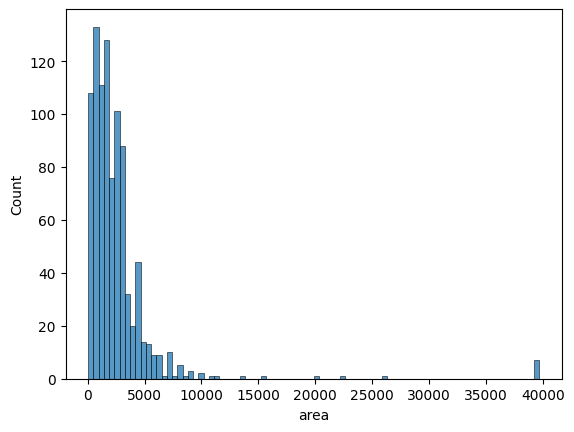

In [501]:
sns.histplot(x='area',data=new_df)

In [503]:
df6=new_df['price'].unique()

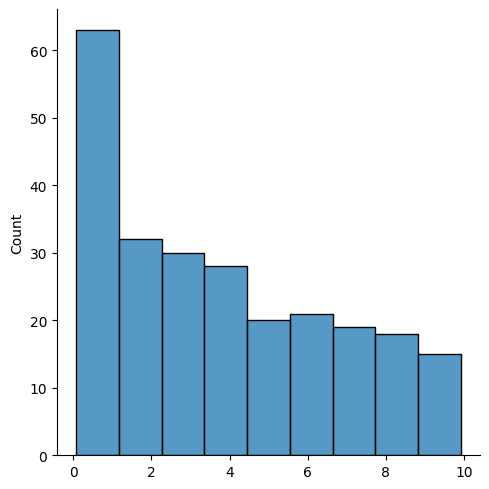

In [505]:
sns.displot(df6)
# the price of houses in gurgaon is decreasing with time
# from 9.9 to 0.07, thats alot of decrease

In [507]:
new_df['price'].agg(['min','max'])

min    0.07
max    9.92
Name: price, dtype: float64

In [508]:
df6 #unique house prices

array([5.25, 5.7 , 2.1 , 5.  , 3.  , 4.5 , 9.92, 1.95, 4.45, 9.  , 8.25,
       2.  , 7.35, 3.4 , 8.4 , 8.5 , 7.6 , 7.  , 4.75, 3.5 , 5.46, 3.3 ,
       7.2 , 6.  , 5.8 , 0.55, 7.49, 6.25, 5.4 , 5.75, 2.55, 5.6 , 7.99,
       3.75, 7.25, 3.55, 2.5 , 6.5 , 9.5 , 5.5 , 5.65, 8.8 , 3.25, 7.5 ,
       0.67, 3.2 , 7.69, 1.55, 3.85, 3.1 , 2.25, 8.7 , 6.8 , 6.2 , 3.6 ,
       3.05, 5.9 , 5.85, 4.  , 5.35, 6.6 , 6.3 , 0.65, 0.85, 0.58, 0.61,
       7.05, 3.69, 6.95, 4.02, 1.  , 0.66, 0.7 , 1.45, 0.95, 0.9 , 0.45,
       0.6 , 3.93, 0.75, 2.75, 0.5 , 0.42, 0.48, 0.35, 2.4 , 2.2 , 1.1 ,
       8.  , 0.82, 1.3 , 0.36, 0.8 , 0.15, 2.8 , 1.75, 1.16, 0.34, 1.5 ,
       0.37, 1.15, 0.49, 1.6 , 0.62, 4.12, 1.87, 1.2 , 0.3 , 1.35, 4.7 ,
       0.22, 1.65, 2.3 , 1.25, 1.7 , 3.12, 0.07, 2.58, 2.95, 8.95, 0.51,
       0.53, 0.63, 1.72, 1.8 , 0.32, 0.78, 1.52, 1.05, 1.4 , 5.15, 0.92,
       0.52, 4.25, 1.85, 4.65, 6.1 , 0.68, 1.07, 4.6 , 5.2 , 0.4 , 4.3 ,
       0.43, 0.47, 0.71, 0.38, 1.44, 3.71, 0.18, 3.

Text(0.5, 1.0, 'balcony vs price')

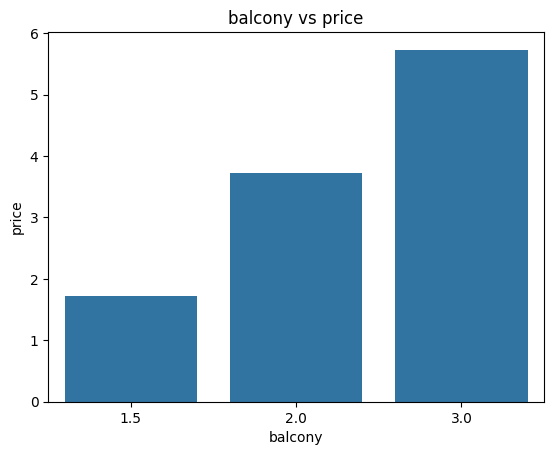

In [513]:
sns.barplot(x='balcony',y='price',data=new_df,ci=None)
plt.title('balcony vs price')

Text(0.5, 1.0, 'bedroom vs price')

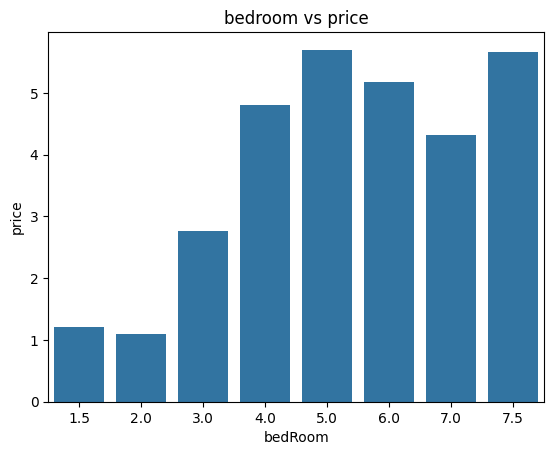

In [516]:
sns.barplot(x='bedRoom',y='price',data=new_df,ci=None)
plt.title( 'bedroom vs price')

In [517]:
# overall visualization

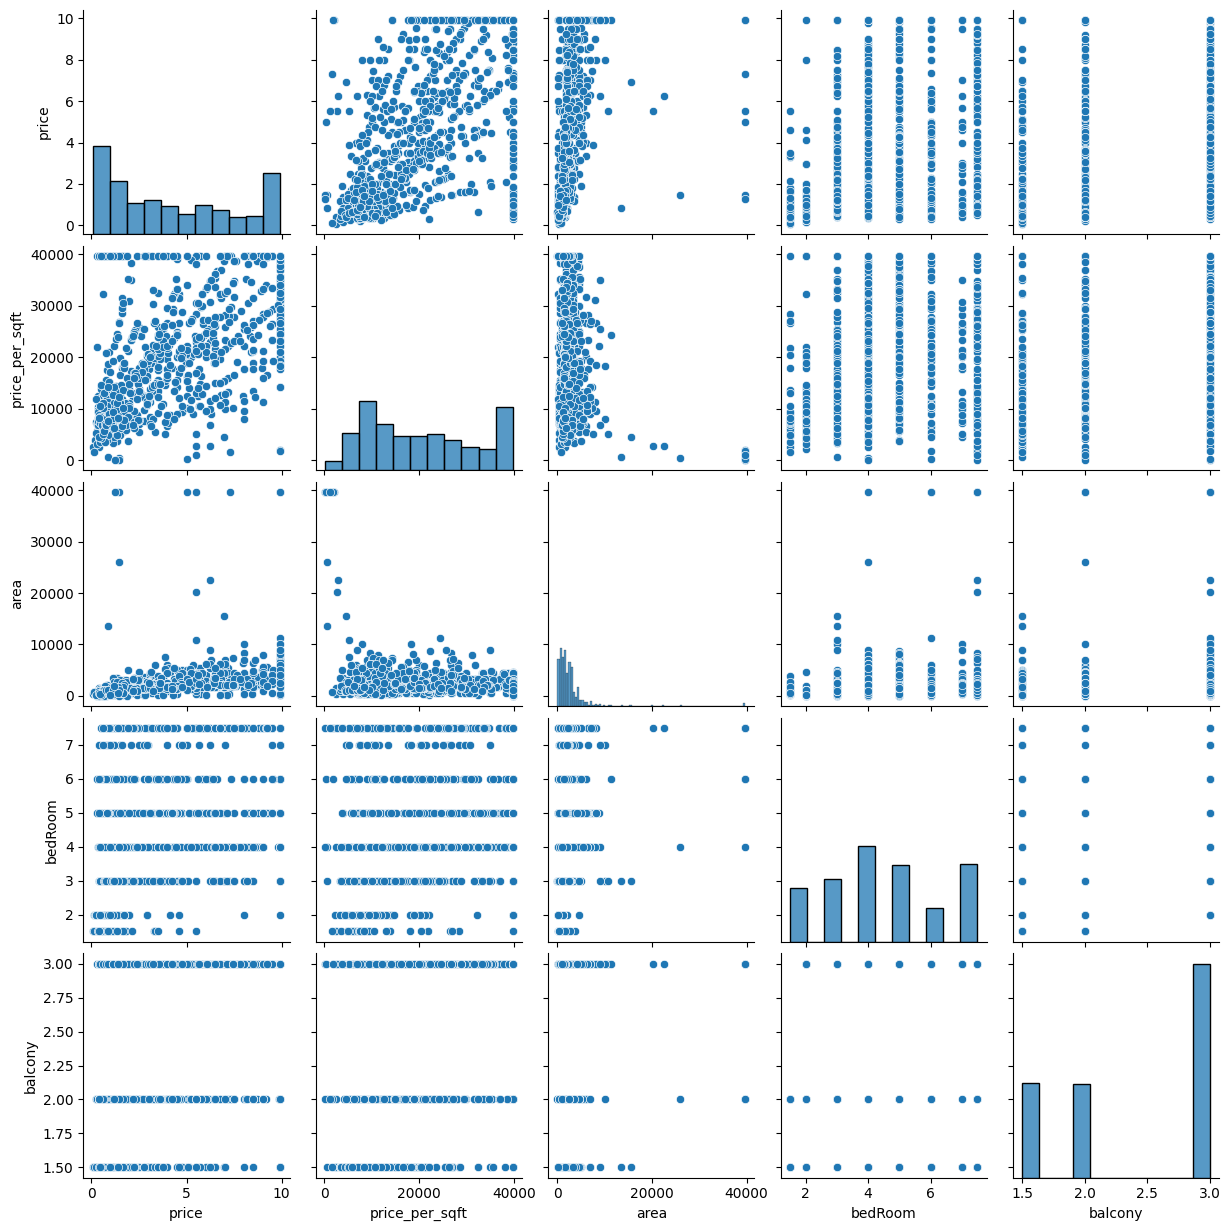

In [509]:
sns.pairplot(new_df)

In [518]:
new_df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'balcony'], dtype='object')

In [519]:
x=new_df[['price_per_sqft', 'area', 'bedRoom', 'balcony']]
y=new_df['price']

# data spliting

In [520]:
from sklearn .model_selection import train_test_split

In [522]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# normalization

In [524]:
from sklearn .preprocessing import MinMaxScaler

In [526]:
scaler=MinMaxScaler(feature_range=(0,1))

In [527]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [528]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((738, 4), (185, 4), (738,), (185,))

# model building

In [529]:
from sklearn .linear_model import LinearRegression

In [530]:
house_model=LinearRegression()

In [531]:
house_model.fit(x_train,y_train)

LinearRegression()

In [532]:
house_model.score(x_train,y_train)

0.5786230767343259

In [534]:
ypred=house_model.predict(x_test)

In [535]:
from sklearn.metrics import r2_score

In [536]:
r2_score(y_test,ypred)

0.5250483038302602

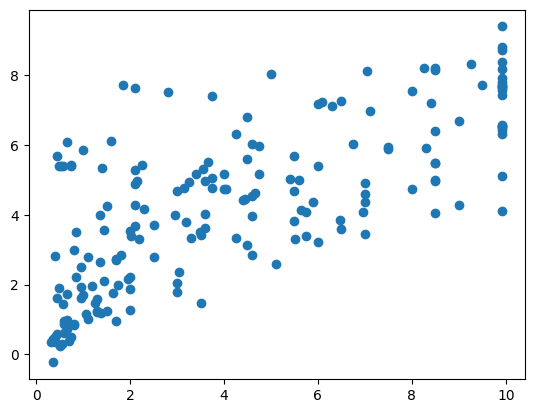

In [539]:
plt.scatter(y_test,ypred)

In [543]:
residuals=y_test-ypred

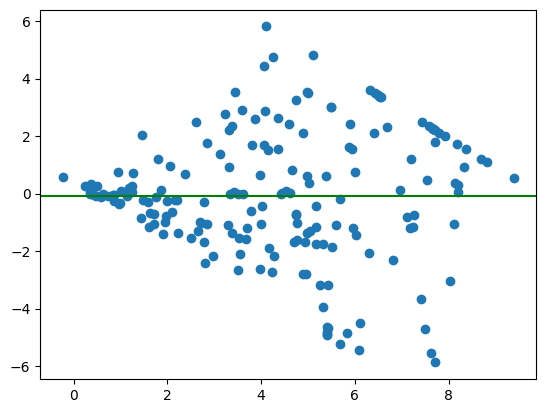

In [546]:
plt.scatter(ypred,residuals)
plt.axhline(residuals.mean(),color='green') # no residual found

In [550]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [594]:
knn=KNeighborsRegressor(n_neighbors=3)

In [595]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [596]:
knn.score(x_train,y_train)

0.8796200149822822

In [597]:
sv=SVR()

In [598]:
sv.fit(x_train,y_train)

SVR()

In [599]:
sv.score(x_train,y_train)

0.7577462942070485

# from the above models, knn model is doing better than all other model, therefore, chose knn for this analysis

In [600]:
y_pred=knn.predict(x_test)

In [601]:
r2_score(y_test,y_pred)

0.7217234777561636

In [615]:
residual=y_test-y_pred

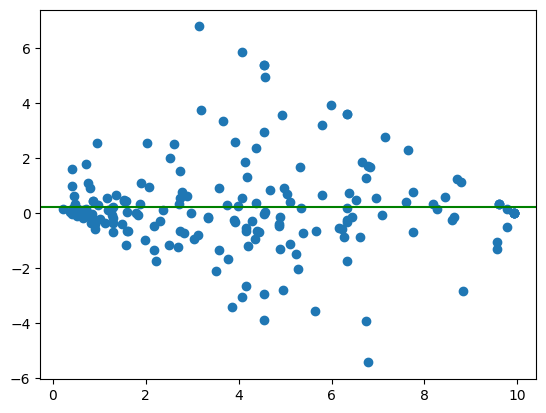

In [616]:
plt.scatter(y_pred,residual)
plt.axhline(residual.mean(),color='green') # no residual found

# knn evaluation

In [602]:
from sklearn.metrics import mean_squared_error

In [603]:
mean_squared_error(y_test,y_pred)

2.8555503303303302

In [604]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.6898373680121794

In [605]:
# the error in the model is less than 5, this model i great

# model validation

In [606]:
from sklearn.model_selection import KFold,cross_val_score

In [607]:
kf=KFold(n_splits=5)

In [608]:
score=cross_val_score(knn, x_train,y_train,cv=kf)

In [609]:
score # model did great after being trained 5 times

array([0.7284731 , 0.60718697, 0.59428468, 0.75164998, 0.76069795])

# model testing

In [613]:
knn.predict(scaler.transform([[38251.0,	549.0,	7.5,	3.0]]))

array([5.65])

In [614]:
knn.predict(scaler.transform([[20115.0	,2610.0,	5.0	,3.0]])) # nicely predicted

array([4.5])

# conclusion

In [583]:
# model is ready for use